In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
import sys
_ = (sys.path.append("/usr/lib/python3.8/site-packages"))

In [ ]:
# Installing tensorflow tf-nightly version and uninstalling tensorboard
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %pip uninstall tb-nightly tensorboardX tensorboard
  %pip install tf-nightly
except Exception:
  pass
import tensorflow as tf


import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

Found existing installation: tensorboard 2.9.1
Uninstalling tensorboard-2.9.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.8/dist-packages/tensorboard-2.9.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.9.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 558.1 MB 8.7 kB/s 
     |████████████████████████████████| 1.7 MB 46.5 MB/s 
     |████████████████████████████████| 5.7 MB 44.6 MB/s 
     |████████████████████████████████| 439 kB 53.8 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensor

In [ ]:
#Checking how many tensorboards are there
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard-plugin-wit 1.8.1


In [ ]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info': No such file or directory


In [ ]:
print(tf.__version__)

2.12.0-dev20221212


In [ ]:
#Ensuring that I have GPU with me
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info = True)
train_dataset = dataset['train']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/104975 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteRE7NQ1/amazon_us_re…

Dataset amazon_us_reviews downloaded and prepared to ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    full_name='amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0',
    description="""
    Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promoti

In [ ]:
train_dataset

<_PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None), 'vine': TensorSpec(shape=(), dtype

In [ ]:
len(train_dataset)

104975

In [ ]:
buffer_size = 30000
batch_size = 128

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size, reshuffle_each_iteration=False)

In [ ]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'17525154'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B006PB3R5I'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'401504666'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'eForCity ALL IN ONE ACCESSORY BUNDLE Compatible with IPOD TOUCH&reg; 4TH GEN 4G 4 USB CAR+TRAVEL CHARGER'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'I am glad I purchased accessories from this location, everything worked great. I will continue to purchase accessories at this location when possible.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2013-02-09'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'Excellent buy'>, 'review_id': <tf.Tensor:

In [ ]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3, 1, 0).numpy())

b'I am glad I purchased accessories from this location, everything worked great. I will continue to purchase accessories at this location when possible.'
tf.Tensor(5, shape=(), dtype=int32)
1
b'Occationallly need to unplug and reinsert the adapter to make it work, which is a major annoyance. Otherwise the sound is OK. I have a Sony CDX-MP40.'
tf.Tensor(2, shape=(), dtype=int32)
0
b"The design of this case is nice and slim, and doesn't take away from the aesthetic of the ipod at all. It's a quality case and at an AMAZING price. Totally worth it!"
tf.Tensor(5, shape=(), dtype=int32)
1
b"I have an older Garmin Nuvi that I needed to move to a dash mount.  This does the trick nicely, although I encountered several problems.      First, the included adhesive discs don't provide enough adhesion on an angled and textured service like my Dodge Intrepid's dashboard.  I added a drop of silicon adhesive to seal the deal.     Second, the fit of the mounting ball will be a little loose on some Garmi

In [ ]:

#Data preprocessing => Building a vocabulary
tokenizer = tfds.deprecated.text.Tokenizer()
vocab_set = set()

for _, reviews in train_dataset.enumerate():
  review_text = reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocab_set.update(reviews_tokens)

vocab_size = len(vocab_set)
vocab_size
#We will paas vocab_size to embedding layer

73738

In [ ]:
#There are 73738 unique words
#Work of encoder => to assign a numeric value to each string
encoder = tfds.deprecated.text.TokenTextEncoder(vocab_set)

In [ ]:
vocab_set

{'STYLEST',
 '029',
 'dropdown',
 'Gooooid',
 'pressable',
 'especialy',
 'KT',
 'Club',
 '9am',
 'Stilish',
 'dispointing',
 'differeint',
 'pest',
 'Constantly',
 'PERFORMANCES',
 'rechargeable',
 'statements',
 'Auris',
 'recomand',
 'Carsoft',
 'T637',
 'two',
 'powerfully',
 'freedom',
 'WORKIE',
 '15',
 'Till',
 'PWB',
 'secrure',
 'TruePower',
 'honker',
 'ultimatley',
 'demas',
 'dramas',
 'İ',
 'Himminbird',
 'venia',
 'performance',
 'grey',
 'sift',
 'abel',
 'lession',
 'preattached',
 'buildings',
 'refuel',
 'mango',
 'glide',
 'tt',
 'unseat',
 '43mm',
 'B0067XVNTG',
 'Albinoni',
 'mattresses',
 '3800mAh',
 'enigneering',
 'Decoder',
 'Cuz',
 'ViseeO',
 'bargin',
 'Dict',
 'haría',
 'compitent',
 'Martians',
 'texts',
 'Oncej',
 'B001B8QUS6',
 'mp3cds',
 'tkes',
 'emotions',
 'govern',
 'optsions',
 'view',
 'suspecious',
 'strong',
 'Golden',
 'EOL',
 'decepcionado',
 'comeback',
 'Lapis',
 'Metal',
 'carryon',
 'tHE',
 'sold',
 'EUROPE',
 'resynchronization',
 '2yr',
 

In [ ]:
#Assigned each unique work a numeric value
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'I am glad I purchased accessories from this location, everything worked great. I will continue to purchase accessories at this location when possible.'
[35334, 21392, 65481, 35334, 9936, 2186, 46275, 69263, 55087, 29967, 45200, 7853, 35334, 54609, 23784, 39820, 9962, 2186, 22284, 69263, 55087, 58775, 50372]
b'Occationallly need to unplug and reinsert the adapter to make it work, which is a major annoyance. Otherwise the sound is OK. I have a Sony CDX-MP40.'
[28663, 54754, 39820, 18796, 10533, 19188, 43385, 1223, 39820, 19485, 67471, 63896, 235, 9519, 22184, 11745, 19501, 65973, 43385, 21341, 9519, 31956, 35334, 27462, 22184, 72254, 4554, 52942]
b"The design of this case is nice and slim, and doesn't take away from the aesthetic of the ipod at all. It's a quality case and at an AMAZING price. Totally worth it!"
[11538, 34165, 10319, 69263, 42597, 9519, 16041, 10533, 27292, 10533, 21259, 67687, 7679, 65204, 46275, 43385, 4253, 10319, 43385, 37474, 22284, 20099, 847, 71604, 22184, 66132

In [ ]:
for i in encoded_example:
  print('{} ==> {}'.format(i, encoder.decode([i])))

35334 ==> I
19313 ==> like
1201 ==> these
37465 ==> br
40971 ==> They
42573 ==> re
45888 ==> wallet
62052 ==> sized
235 ==> which
30042 ==> makes
55838 ==> them
51535 ==> very
45240 ==> handy
1970 ==> Four
46264 ==> stars
31281 ==> because
43385 ==> the
2117 ==> flip
28163 ==> side
10319 ==> of
49032 ==> being
17255 ==> xmall
9519 ==> is
10348 ==> that
38748 ==> they
71238 ==> are
981 ==> easily
26583 ==> misplaced


In [ ]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor > 3, 1, 0)
  return encoded_text, label

In [ ]:
def encode_map_fxn(tensor):

  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode, 
                                       inp = [text, label],
                                       Tout = (tf.int64, tf.int32))
  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fxn)

In [ ]:
for f0, f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[35334 21392 65481 35334  9936  2186 46275 69263 55087 29967 45200  7853
 35334 54609 23784 39820  9962  2186 22284 69263 55087 58775 50372], shape=(23,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[28663 54754 39820 18796 10533 19188 43385  1223 39820 19485 67471 63896
   235  9519 22184 11745 19501 65973 43385 21341  9519 31956 35334 27462
 22184 72254  4554 52942], shape=(28,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
#Train-Test Split
take_size = 10000

train_data = ar_encoded_data.skip(take_size).shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size)

#Why we didn't shuffle test data => During training we want our model to generalise better and not learn any patterns about data so there shuffling the sample is imp, but when we are testing the model, shuffling doesnt make sense

test_data = ar_encoded_data.take(take_size)
test_data = test_data.padded_batch(batch_size)

In [ ]:
vocab_size +=1

In [ ]:
sample_text, sample_label = next(iter(test_data))
sample_text[0], sample_label[0]

(<tf.Tensor: shape=(642,), dtype=int64, numpy=
 array([35334, 21392, 65481, 35334,  9936,  2186, 46275, 69263, 55087,
        29967, 45200,  7853, 35334, 54609, 23784, 39820,  9962,  2186,
        22284, 69263, 55087, 58775, 50372,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
for f0, f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[81 47]
[88 40]
[81 47]
[83 45]
[42 86]
[85 43]
[85 43]
[87 41]
[74 54]
[53 75]


In [ ]:
from tensorflow import keras
#Building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for nodes in [64, 64]:
  model.add(tf.keras.layers.Dense(nodes, activation = 'relu'))

model.add(tf.keras.layers.Dense(1))

In [ ]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [ ]:
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/sentiment_analysis.hdf5', verbose = 1, save_best_only= True)

model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits= True),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = 1, validation_data = test_data, callbacks = [tensorboard_callback, checkpointer])

742/742 [==============================] - ETA: 0s - loss: 0.3677 - accuracy: 0.8309 
Epoch 1: val_loss improved from inf to 0.28004, saving model to /tmp/sentiment_analysis.hdf5
742/742 [==============================] - 7854s 11s/step - loss: 0.3677 - accuracy: 0.8309 - val_loss: 0.2800 - val_accuracy: 0.8785


In [ ]:
model.save('/tmp/final_sentiment_analysis.hdf5')

In [ ]:
!ls -alrt /tmp/*.hdf5

In [ ]:
eval_loss, eval_acc = model.evaluate(test_data)
print(' \nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 268s 3s/step - loss: 0.2800 - accuracy: 0.8785
 
Eval loss: 0.280, Eval accuracy: 0.878


In [ ]:
for f0, f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1], shape=(128,), dtype=int32)
4/4 [==============================] - 8s 1s/step
[[ 4.4384861e+00]
 [-5.1699722e-01]
 [ 2.7141156e+00]
 [ 3.6367779e+00]
 [ 3.4922295e+00]
 [-6.7460811e-01]
 [-7.5568843e-01]
 [-1.5354314e+00]
 [ 1.0085943e+00]
 [-3.7644501e+00]
 [ 2.3314633e+00]
 [-3.2577462e+00]
 [ 5.1570230e+00]
 [-3.6735518e+00]
 [ 1.1395743e+00]
 [-1.5990314e-01]
 [-2.9718041e+00]
 [ 5.0861082e+00]
 [ 2.8585799e+00]
 [ 5.0845933e+00]
 [-3.1209460e-01]
 [ 1.5861374e+00]
 [ 3.1005015e+00]
 [ 1.8382294e+00]
 [ 4.2532110e+00]
 [-9.1203094e-01]
 [ 2.7604191e+00]
 [-5.9813917e-01]
 [ 4.7501035e+00]
 [ 3.0945411e+00]
 [-1.3352592e+00]
 [ 6.6676641e-01]
 [-3.6948323e+00]
 [ 4.8717260e+00]
 [ 1.6889788e+00]
 [ 2.0684114e+00]
 [

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         9438592   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
model.get_layer('embedding').output

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'embedding')>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import matplotlib.pyplot as plt

def plot_graph(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_' + metric], '')
  plt.xlabel("No. of Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_' + metric])
  plt.show()

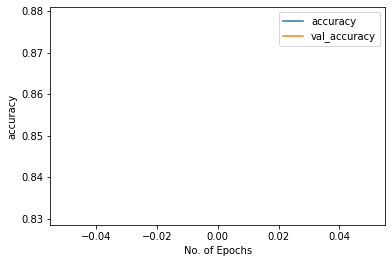

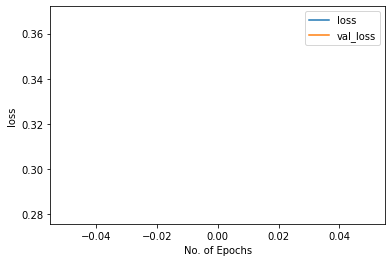

In [ ]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [ ]:
#tf.keras.backend.clear.session()
sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5', compile = False)

In [ ]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fxn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [ ]:
pred_text = ('It is okay but I was expecting something more amazing.')
predictions = predict_fxn(pred_text)
print(predictions)

[847, 9519, 39183, 41883, 35334, 20299, 16626, 18951, 9334, 53619]
[847, 9519, 39183, 41883, 35334, 20299, 16626, 18951, 9334, 53619, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1/1 [==============================] - 2s 2s/step
[[-3.2494137]]


In [ ]:
pred_text = ('Very good product by the company. I love it.')
predictions = predict_fxn(pred_text)
print(predictions)

[71709, 59767, 40680, 21175, 43385, 47803, 35334, 36397, 67471]
[71709, 59767, 40680, 21175, 43385, 47803, 35334, 36397, 67471, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1/1 [==============================] - 0s 33ms/step
[[5.2915387]]


In [ ]:
pred_text = ('This is very bad gadget I have ever used in my life.')
predictions = predict_fxn(pred_text)
print(predictions)

[53302, 9519, 51535, 20592, 63229, 35334, 27462, 46031, 46801, 11503, 29373, 32730]
[53302, 9519, 51535, 20592, 63229, 35334, 27462, 46031, 46801, 11503, 29373, 32730, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1/1 [==============================] - 0s 28ms/step
[[3.6035585]]


In [ ]:
pred_text = ('Decent Product. But not that good compared to previous version.')
predictions = predict_fxn(pred_text)
print(predictions)

[20723, 10317, 60623, 66933, 10348, 59767, 64536, 39820, 14461, 628]
[20723, 10317, 60623, 66933, 10348, 59767, 64536, 39820, 14461, 628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1/1 [==============================] - 0s 77ms/step
[[-2.9786177]]
